## Performing PCA on video frames with static background and moving object

Loading video from youtube according to:

https://towardsdatascience.com/the-easiest-way-to-download-youtube-videos-using-python-2640958318ab

"Using this object, we can download the video/audio, and inspect some of the properties of the video itself. Some of the interesting methods we can use are:

    length — length of the video in seconds
    rating — the rating of the video
    views — the number of views"

In [1]:
from pytube import YouTube # for loading videos from youtube
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

In [ ]:
# # Skip this part, already saved .mp4 video

# video = YouTube('https://www.youtube.com/watch?v=8IVMo9lvJQk')

# # see all streams availible for .mp4 format
# video.streams.filter(file_extension = "mp4").all()

# # download chosen stream
# video.streams.get_by_itag(18).download()

In [ ]:
# # Skip this part, as data from frames were already saved in 'Kepler_PCA.npy' file

# cap = cv2.VideoCapture('Keplers Orbit.mp4')
# frameCount  = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
# frameWidth  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
# frameHeight = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

In [ ]:
# #save RGB frames as np.arrays shape
# frames = np.zeros((frameCount, frameHeight, frameWidth, 3),np.dtype('uint8'))

# counter = 0
# ret = True

# while (counter < frameCount  and ret):
#     ret, frame = cap.read()
#     frames[counter] = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
#     counter +=1
    
# cap.release()
# cv2.destroyAllWindows()

In [ ]:
# # check that frames saved correctly

# plt.imshow(frames[-1])

In [ ]:
# # reshape frames to long arrays
# images        = frames.shape[0]
# height        = frames.shape[1]
# width         = frames.shape[2]
# color         = frames.shape[3]

# X = np.zeros((images,height*width*color),np.dtype('uint8'))

# for ind, frame in enumerate(frames):
#     X[ind] = frame.flatten() 

# X.shape

In [ ]:
# # save nparray to .npy file
# from numpy import save

# save('Kepler_PCA.npy', X)

In [3]:
import numpy as np
from numpy import load

# load RGB frames data (frames,height*width*color)
X = load('Kepler_PCA.npy')
X.shape

(901, 691200)

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

In [5]:
# shape (n_samples, n_features)
X_pca.shape

(901, 2)

In [6]:
# reconstruction to original space
X_hat = pca.inverse_transform(X_pca)

In [25]:
# just checking min max values before and after reconstruction
print(X.min(), X.max())
print(X_hat.min(), X_hat.max())

0 255
-44.348335699613855 257.0931456398879


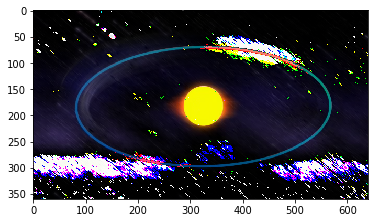

In [8]:
# plot reconstructed frame
frames_hat=X_hat.reshape(901,360, 640, 3)

plt.imshow(frames_hat[-30].astype(np.uint8))
plt.show()

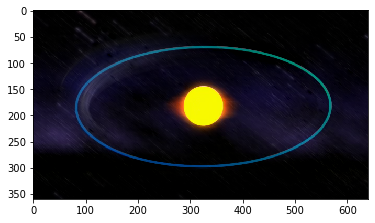

In [29]:
# plot reconstructed frame with clipping values to 0-255 
frameclip = np.clip(frames_hat[-30], 0, 255, out=frames_hat[-30])

plt.imshow(frameclip.astype(np.uint8))
plt.show()

In [30]:
# just checking min max values 
pca.components_.min(), pca.components_.max()

(-0.007796603771807069, 0.012813066045104373)

In [35]:
# just checking min max values after *255
(pca.components_*255).min(), (pca.components_*255).max()

(-1.9881339618108025, 3.267331841501615)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


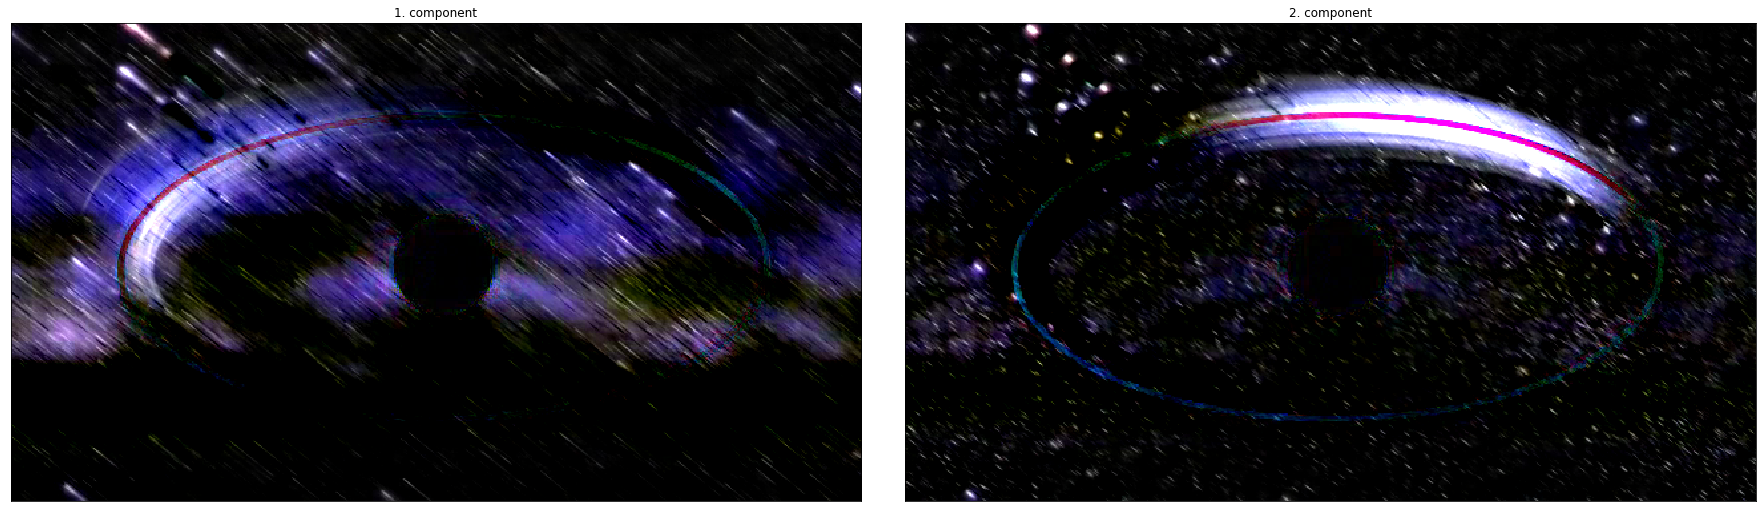

In [31]:
# plot pc1 and pc2 (scaling pc*255)

fig, axes = plt.subplots(1,2, figsize=(25,7),
                        subplot_kw={'xticks': (),'yticks': ()})

for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow((component.reshape(360, 640, 3)*255)) # values are clipped to 0-1 range
    ax.set_title("{}. component".format((i+1)))
    
fig.tight_layout()
plt.show()

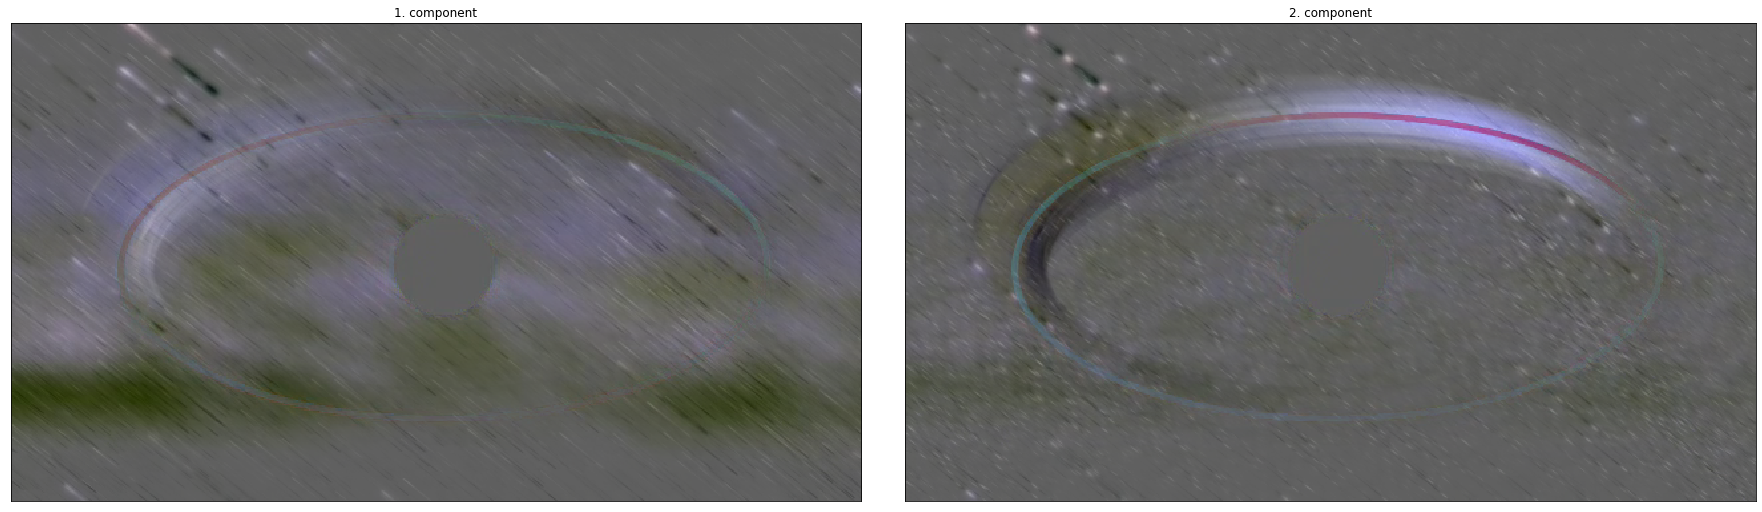

In [32]:
# plot pc1 and pc2 (scale from pca min-max to 0-255 scale)
pca_scale=np.interp(pca.components_, (pca.components_.min(), pca.components_.max()), (0, 255))

fig, axes = plt.subplots(1,2, figsize=(25,7),
                        subplot_kw={'xticks': (),'yticks': ()})

for i, (component, ax) in enumerate(zip(pca_scale.astype('uint8'), axes.ravel())):
    ax.imshow((component.reshape(360, 640, 3)))
    ax.set_title("{}. component".format((i+1)))
    
fig.tight_layout()
plt.show()